# IDENTITAS KELOMPOK

- Mata Kuliah: Data Mining A
- Dosen Pengampu: Dini Adni Navastara, S.Kom, M.Sc.
- Kelompok 7, Anggota:
    - 5025201054 / Hesekiel Nainggolan
    - 5025201079 / Julio Geraldi
    - 5025201229 / Surya Abdillah


Tugas:
Melakukan Exploratory Data Analysis (EDA) dan Data Preprocessing pada dataset penguin dari tautan berikut:

[Penguin Kaggle](https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data)

## Install dan Import Library
Dalam pengerjaan tugas ini diperlukan beberapa library / pustaka, yaitu:
- opendatasets: untuk download dataset kaggle dari jupyter notebook
- pandas: untuk mengatur, membuat, dan memanipulasi data frame, dll

In [1]:
!pip install opendatasets
!pip install pandas
!pip install imblearn

     ---------------------------------------- 63.3/63.3 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.13-py3-none-any.whl size=77731 sha256=1f387de0171be57178b3d5ec51cb932433c82c321c9cf2f4f019ba7f65da1b45
  Stored in directory: c:\users\surya\appdata\local\pip\cache\wheels\1b\22\79\e73b3e988388377c1cda3385bfa20c1799be101c2e12bbe3dc
Successfully built kaggle


In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

## Download dan Import Dataset
Download dataset kaggle dilakukan menggunakan bantuan library `opendatasets` sehingga dapat mendownload dari jupyter notebook secara langsung. Apabila kita menjalankan kode program di bawah, maka kita akan diminta untuk memasukkan kaggle username dan key, cara mendapatkannya sebagai berikut:
1. Login akun kaggle
2. Masuk "Your Profil"
3. Memilih menu "Account"
4. Apabil kita scroll sedikit ke bawah, akan tampil "Create New API Token". Klik tombol tersebut, maka kaggle akan otomatis mendownload file `kaggle.json`
5. Buka file dan kita akan melihat kaggle username dan key kita.

Referensi: https://www.geeksforgeeks.org/how-to-download-kaggle-datasets-into-jupyter-notebook/

In [3]:
od.download("https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  suryaabdillah


Your Kaggle Key:

  ········


100%|██████████| 11.3k/11.3k [00:00<00:00, 5.98MB/s]

Terdapat 2 data set berbentuk csv dengan judul `penguins_lter.csv` dan `penguins_size.csv`. Import dataset dapat dilakukan dengand bantuan library pandas dengan fungsi `read_csv`. Selain itu, kita bisa sekilas melihat dataset dengan `head()` yang akan menampilkan 5 baris awal dari data. 

In [4]:
# LTER: long term ecological research network
lter_df = pd.read_csv("./palmer-archipelago-antarctica-penguin-data/penguins_lter.csv")
lter_df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [5]:
size_df = pd.read_csv("./palmer-archipelago-antarctica-penguin-data/penguins_size.csv")
size_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Dalam kedua data tersebut memiliki kesamaan kolom, yakni data set `penguins_size.csv` juga terdapat pada data set `penguins_lter.csv`, sehingga dalam pengolahan ini kita hanya akan menggunakan data set `penguins_kter.csv` saja.

In [6]:
print("Fitur masing-masing data frame:")
print("LTER data frame: ", lter_df.columns)
print("SIZE data frame: ", size_df.columns)

Fitur masing-masing data frame:
LTER data frame:  Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')
SIZE data frame:  Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


### DOWNLOAD DATASET DARI GOOGLE COLAB
Apabila program dijalankan pada google colab dapat meng uncomment program 2 blok kode di bawah. dan menunggah file `kaggle.json` pada google colab.

In [7]:
# # install library kaggle dan memindah file kaggle.json pada tempatnya
# ! pip install -q kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [8]:
# # download file
# ! kaggle datasets download parulpandey/palmer-archipelago-antarctica-penguin-data -f penguins_lter.csv
# ! kaggle datasets download parulpandey/palmer-archipelago-antarctica-penguin-data -f penguins_size.csv

In [9]:
# # LTER: long term ecological research network
# lter_df = pd.read_csv("penguins_lter.csv")
# lter_df.head()

In [10]:
# size_df = pd.read_csv("penguins_size.csv")
# size_df.head()

## DATA CLEANSING

### Dimensi
Dimensi data frame adalah 344 x 17, yakni 344 baris data dengan 17 kolom

In [11]:
lter_df.shape

(344, 17)

### Tipe Data
Tipe data pada dataframe terdiri dari 3, yakni int64, float64, dan object, dengan rincian berikut:
- object: studyName, studyName, Region, Island, Stage, Individual ID, Clutch Completion, Data Egg, Sex, dan Comments
- float64: Culmen Lenght (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Delta 15 N (o/oo), Delta 13 C (o/oo)
- int64: Sample Number

In [12]:
lter_df.dtypes

studyName               object
Sample Number            int64
Species                 object
Region                  object
Island                  object
Stage                   object
Individual ID           object
Clutch Completion       object
Date Egg                object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Comments                object
dtype: object

In [13]:
# Merubah nilai Species dengan kata pertama
for i in range(0, lter_df.shape[0]):
  lter_df.loc[i,"Species"] = lter_df.loc[i,"Species"].split()[0]

In [14]:
# daftar kolom bertipe kategorikal
kategorikal = list(lter_df.select_dtypes(['object']))
print(kategorikal)

['studyName', 'Species', 'Region', 'Island', 'Stage', 'Individual ID', 'Clutch Completion', 'Date Egg', 'Sex', 'Comments']


In [15]:
# daftar kolom bertipe kuantitatif
kuantitatif = list(lter_df.select_dtypes(['int64', 'float64']))
kuantitatif

['Sample Number',
 'Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

### Deskripsi Data
Untuk dapat mempermudah pengolahan data, maka kita perlu memahami makna dari masing-masing kolom/fitur yang ada pada dataframe.

| KOLOM | PENGERTIAN | CONTOH | MAKNA | TIPE DATA |
| :---: | ---------- | :----: | ----- | :-------: |
| studyName | nama study data diambil | PAL0708 | baris pertama didapatkan dari studi dengan nama studi PAL0708 | nominal |
| Sample Number | nomor sampel masing-masing studi | 1 | baris pertama merupakan pengamatan 1 dari studi name PAL0808 | nominal |
| Species | spesies dari penguin yang diamati | Adelie Penguin (Pygoscelis adeliae) | penguin pada baris pertama merupakan spesies Adelie Penguin (Pygoscelis adeliae) | nominal |
| Region | wilayah pengamatan atau penguin | Anvers | penguin sample nomor 1 berada pada wilayah Anvers | nominal |
| Island | nama pulau dari region | Biscoe | region Anvers berada pada pulau Biscoe | nominal |
| Stage | tingkatan umur dan jumlah telur dari pinguin yang diamati | Adult, 1 Egg Stage | pinguin nomor sampel 1 merupakan pinguin dewasa dan telah memiliki 1 telur | nominal |
| Individual ID | ID masing-masing penguin | N1A1 | baris pertama merupakan pengamatan pada penguin ID N1A1 | nominal |
| Clutch Completion | Apakah studi sarang diamati dengan kopling penuh (2 telur, emperor dan king) | Yes | sarang diamati dengan kopling penuh | boolean (nominal) |
| Date Egg | tanggal dari studi sarang dengan 1 telur (sample) (MM/DD/YY) | 11/11/07 | 1 telur dari baris pertama diamati pada taggal 11 November tahun 07 | date |
| Culmen Length (mm) | panjang punggung paruh dalam milimeter | 39.1 | panjang pungguh paruh adalah 39.1 mm | ratio |
| Culmen Depth (mm) | kedalaman punggung paruh dalam milimiter | 18.7 | kedalaman punggung paruh adalah 18.7 mm | ratio |
| Flipper Length (mm) | panjang sirip dalam milimeter | 181.0 | panjang sirip adalah 181 mm | ratio |
| Body Mass (g) | massa badan dalam gram | 181.0 | massa badan adalah 181 gram | ratio |
| Sex | jenis kelamin | MALE | jenis kelamin jantan | nominal |
| Delta 15 N (o/oo) | ukuran rasio isotop stabil 15N:14N | 8.94956 | rasio 8.94956 | ratio |
| Delta 13 C (o/oo) | ukuran rasio isotop stabil 13C:12C | -24.69454 | rasio -24.69454 | ratio |
| Comments | informasi tambahan terkait data | Not enough blood for isotopes. | darah tidak cukup untuk mendapatkan nilai delta 15N / 13C isotop | nominal (unstructured data) |

NB:
- o/oo satuan salinitas (kadar garam)

Referensi:
- https://allisonhorst.github.io/palmerpenguins/reference/penguins_raw.html 
- https://github.com/allisonhorst/palmerpenguins/blob/main/README.md

**Kesimpulan**: Terdapat beberapa kolom dengan tipe data yang tidak sesuai, sehingga pada data preprocessing perlu dilakukan perubahan tipe data agar mempermudah proses pengolahan. Kombinasi dari fitur `studyName` dan `Sample Number` menjadi ID dari dataset pinguin ini, sehingga bisa dilakukan dropping pada kedua kolom.

#### Perubahan Object Menjadi Category

In [16]:
for i in kategorikal:
  if i != "Date Egg":
    lter_df[i] = lter_df[i].astype("category")

#### perubahan Date Egg menjadi date

In [17]:
lter_df["Date Egg"] = lter_df["Date Egg"].astype('datetime64[ns]')

In [18]:
lter_df.dtypes

studyName                    category
Sample Number                   int64
Species                      category
Region                       category
Island                       category
Stage                        category
Individual ID                category
Clutch Completion            category
Date Egg               datetime64[ns]
Culmen Length (mm)            float64
Culmen Depth (mm)             float64
Flipper Length (mm)           float64
Body Mass (g)                 float64
Sex                          category
Delta 15 N (o/oo)             float64
Delta 13 C (o/oo)             float64
Comments                     category
dtype: object

### Informasi Fitur
Dengan memanfaatkan fungsi `.info()` dan `.describe()` kita dapat mengetahui informasi garis besar dari setiap fitur

In [19]:
lter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   studyName            344 non-null    category      
 1   Sample Number        344 non-null    int64         
 2   Species              344 non-null    category      
 3   Region               344 non-null    category      
 4   Island               344 non-null    category      
 5   Stage                344 non-null    category      
 6   Individual ID        344 non-null    category      
 7   Clutch Completion    344 non-null    category      
 8   Date Egg             344 non-null    datetime64[ns]
 9   Culmen Length (mm)   342 non-null    float64       
 10  Culmen Depth (mm)    342 non-null    float64       
 11  Flipper Length (mm)  342 non-null    float64       
 12  Body Mass (g)        342 non-null    float64       
 13  Sex                  334 non-null  

Kesimpulan: terdapat missing value pada beberapa fitur baik metrik maupun non-metrik, sehingga perlu dilakukan penanganan missing value pada data preprocessing agar proses pengolahan dapat berjalan.

In [20]:
lter_df.describe()

,Sample Number,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,344.000000,342.000000,342.000000,342.000000,342.000000,330.000000,331.000000
mean,63.151163,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,40.430199,5.459584,1.974793,14.061714,801.954536,0.551770,0.793961
min,1.000000,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,29.000000,39.225000,15.600000,190.000000,3550.000000,8.299890,-26.320305
50%,58.000000,44.450000,17.300000,197.000000,4050.000000,8.652405,-25.833520
75%,95.250000,48.500000,18.700000,213.000000,4750.000000,9.172123,-25.062050
max,152.000000,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


Kesimpulan: skala fitur pada dataframe bersifat heterogen, sehingga diperlukan normalisasi / standarisasi

In [21]:
lter_df.describe(include = "category")

,studyName,Species,Region,Island,Stage,Individual ID,Clutch Completion,Sex,Comments
count,344,344,344,344,344,344,344,334,26
unique,3,3,1,3,1,190,2,3,7
top,PAL0910,Adelie,Anvers,Biscoe,"Adult, 1 Egg Stage",N21A1,Yes,MALE,Nest never observed with full clutch.
freq,120,152,344,168,344,3,308,168,13


Kesimpulan: fitur `Region` dan `Stage` hanya memiliki 1 nilai unique. Oleh sebab itu, kedua fitur dapat dihapus saja karena tidak akan memengaruhi proses pengolahan.

#### Drop fitur studyName dan Sample Number

In [22]:
lter_df = lter_df.drop(columns=['studyName', 'Sample Number'])
print(lter_df.columns)

Index(['Species', 'Region', 'Island', 'Stage', 'Individual ID',
       'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')


#### Drop fitur region dan stage

In [23]:
lter_df = lter_df.drop(columns=['Region', 'Stage'])
lter_df.columns

Index(['Species', 'Island', 'Individual ID', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'Comments'],
      dtype='object')

### Unique Value

In [24]:
lter_df.nunique()

Species                  3
Island                   3
Individual ID          190
Clutch Completion        2
Date Egg                50
Culmen Length (mm)     164
Culmen Depth (mm)       80
Flipper Length (mm)     55
Body Mass (g)           94
Sex                      3
Delta 15 N (o/oo)      330
Delta 13 C (o/oo)      331
Comments                 7
dtype: int64

In [25]:
for i in range(0, lter_df.shape[1]):
    print(f"Nilai unique pada kolom {lter_df.columns[i]}:")
    print(pd.unique(lter_df.iloc[:,i]), "\n")

Nilai unique pada kolom Species:
['Adelie', 'Chinstrap', 'Gentoo']
Categories (3, object): ['Adelie', 'Chinstrap', 'Gentoo'] 

Nilai unique pada kolom Island:
['Torgersen', 'Biscoe', 'Dream']
Categories (3, object): ['Biscoe', 'Dream', 'Torgersen'] 

Nilai unique pada kolom Individual ID:
['N1A1', 'N1A2', 'N2A1', 'N2A2', 'N3A1', ..., 'N20A2', 'N54A1', 'N54A2', 'N43A1', 'N43A2']
Length: 190
Categories (190, object): ['N100A1', 'N100A2', 'N10A1', 'N10A2', ..., 'N99A1', 'N99A2', 'N9A1', 'N9A2'] 

Nilai unique pada kolom Clutch Completion:
['Yes', 'No']
Categories (2, object): ['No', 'Yes'] 

Nilai unique pada kolom Date Egg:
['2007-11-11T00:00:00.000000000' '2007-11-16T00:00:00.000000000'
 '2007-11-15T00:00:00.000000000' '2007-11-09T00:00:00.000000000'
 '2007-11-12T00:00:00.000000000' '2007-11-10T00:00:00.000000000'
 '2007-11-13T00:00:00.000000000' '2007-11-19T00:00:00.000000000'
 '2008-11-06T00:00:00.000000000' '2008-11-09T00:00:00.000000000'
 '2008-11-15T00:00:00.000000000' '2008-11-13T

**Kesimpulan**: pada fitur Sex terdapat nilai `.` dimana hal ini perlu dirubah menjadi NaN.

In [26]:
lter_df["Sex"] = lter_df["Sex"].replace('.', np.nan)
print(pd.unique(lter_df["Sex"]), "\n")

['MALE', 'FEMALE', NaN]
Categories (2, object): ['FEMALE', 'MALE'] 



### Missing Value dan Duplikasi Data

In [27]:
lter_df.isna().sum()

Species                  0
Island                   0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     11
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [28]:
lter_df.duplicated().sum()

0

**Kesimpulan**: 
- terdapat missing value pada kolom Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Sex, Delta 15 N (o/oo), Delta 13 C (o/oo), dan Comments.
- tidak ada duplikasi data

#### Penanganan missing value

##### Missing value kategorikal
Daftar fitur dengan missing value:
- Sex
- Comments

fitur `Sex` merupakan jenis kelamin dari pinguin. Distribusi pada fitur ini seimbang, dimana jumlah data dengan MALE dan FEMALE hampir sama. Oleh sebab itu, penanganan missing value yang dilakukan adalah drop baris karena assign-nilai dengan modus tidak memiliki alasan yang kuat dari segi `kemungkinan`.

In [29]:
print("Sebelum drop: ", len(lter_df))
lter_df.dropna(subset = ['Sex'], inplace = True)
print("Sesudah drop: ", len(lter_df))

Sebelum drop:  344
Sesudah drop:  333


fitur `Comments` dapat dihapuskan karena karena pada banyak baris, nilai fitur ini missing

In [30]:
lter_df = lter_df.drop(columns=['Comments'])
lter_df.columns

Index(['Species', 'Island', 'Individual ID', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

##### Missing value kuantitatif
Daftar fitur dengan missing value:
- Culmen Length (mm)
- Culmen Depth (mm)
- Flipper Length (mm) 
- Body Mass (g)
- Delta 15 N (o/oo) 
- Delta 13 C (o/oo)

In [31]:
quantity_missing = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']
for i in quantity_missing:
  lter_df[i] = lter_df[i].fillna(lter_df[i].mean())

In [32]:
lter_df.isna().sum()

Species                0
Island                 0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

## VISUALISASI DATA

### Line Plot + Rugplot

Daftar kolom

In [33]:
lter_df.columns

Index(['Species', 'Island', 'Individual ID', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

membuat data frame baru untuk data tanggal

In [34]:
line_df = lter_df.copy()
# line_df = line_df.drop(columns=['Clutch Completion', 'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'])
print(line_df.columns)

year = line_df['Date Egg'].dt.strftime('%Y')
month = line_df['Date Egg'].dt.strftime('%m')
day = line_df['Date Egg'].dt.strftime('%m-%d')

line_df["year"] = year
line_df["month"] = month
line_df["day"] = day

Index(['Species', 'Island', 'Individual ID', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')


In [35]:
line_df.columns = ['Species', 'Island', 'Individual ID', 'Clutch_Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)',
       'year', 'month', 'day']

In [36]:
line_df["day"]

0      11-11
1      11-11
2      11-16
4      11-16
5      11-16
       ...  
338    12-01
340    11-22
341    11-22
342    11-22
343    11-22
Name: day, Length: 333, dtype: object

#### Banyak individu pinguin yang diamati pada setiap tahunnya berdasarkan species
Melakukan grouping berdasarkan fitur year dan Species, lalu mendapatkan banyak nilai unique dari Individual ID

In [37]:
species_yearly = line_df.groupby(["year", "Species"]).agg({"Individual ID": pd.Series.nunique})
species_yearly

Individual ID
year Species                 
2007 Adelie                44
     Chinstrap             26
     Gentoo                33
2008 Adelie                50
     Chinstrap             18
     Gentoo                45
2009 Adelie                52
     Chinstrap             24
     Gentoo                41

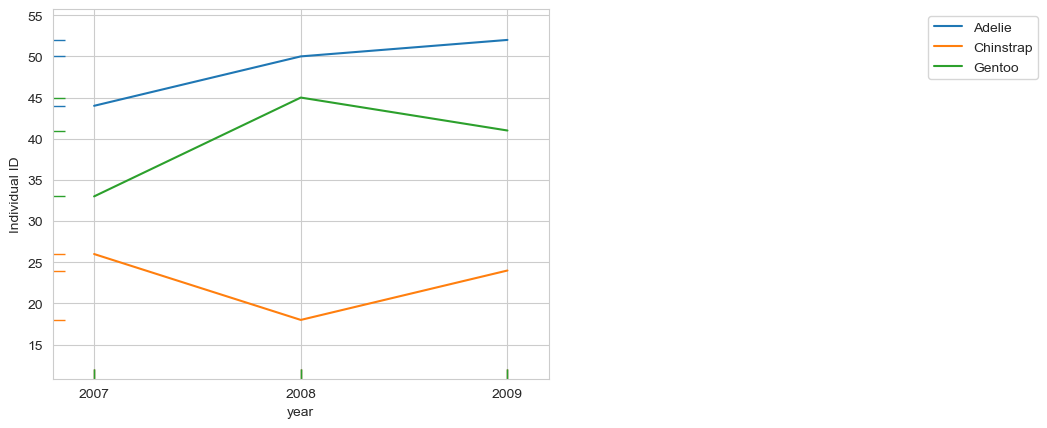

In [38]:
# Menggambarkan dengan line plot
sns.lineplot(data = species_yearly, x = 'year', y = 'Individual ID', hue = 'Species')
sns.rugplot(data = species_yearly, x = 'year', y = 'Individual ID', hue = 'Species')
plt.legend(bbox_to_anchor=(2, 1))
plt.show()

**Kesimpulan**: perkembangan per tahun dari banyak individu pinguin per spesies pada tahun tidak memiliki kemiripan pada masing-masing species.
- banyak pinguin spesies Adelie yang diamati mengalami kenaikan pada setiap tahunnya
- banyak pinguin spesies Chinstrap yang diamati mengalami kenaikan yang besar pada 2008, tetapi mengalami penurunan pada 2009
- banyak pinguin spesies Gentoo yang diamati mengalami penurunan besar pada 2008 dan kenaikan pada 2009, namun secara garis besar 2007 ke 2009 menurun

#### Banyak individu pinguin yang diamati per tahunnya berdasarkan Island

In [39]:
# melakukan grouping berdasarkan tahun dan pulau dan mendapatkan banyak nilai unik dari individual ID
island_yearly = line_df.groupby(["year", "Island"]).agg({"Individual ID": pd.Series.nunique})
island_yearly

Individual ID
year Island                  
2007 Biscoe                43
     Dream                 45
     Torgersen             15
2008 Biscoe                63
     Dream                 34
     Torgersen             16
2009 Biscoe                57
     Dream                 44
     Torgersen             16

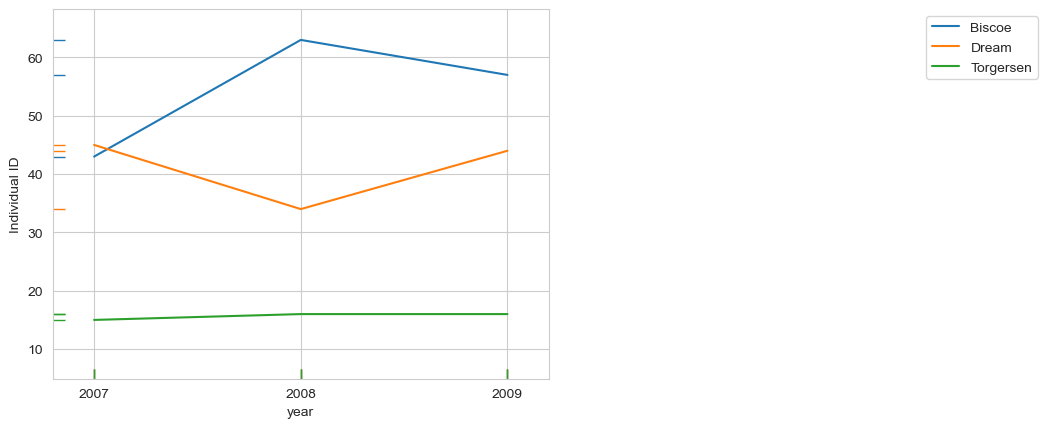

In [40]:
sns.lineplot(data = island_yearly, x = 'year', y = 'Individual ID', hue = 'Island')
sns.rugplot(data = island_yearly, x = 'year', y = 'Individual ID', hue = 'Island')
plt.legend(bbox_to_anchor=(2, 1))
plt.show()

**Kesimpulan**:
- jumalah individu pinguin pertahun dari pulau Biscoe mengalami kenaikan pada 2008, tetapi menurun pada tahun 2009. Secara garis besar menaik dari 2007 ke 2009
- jumlah individui pinguin pertahun dari pulau Dream mengalami penurunan pada tahun 2008, tetapi mengalami sedikit kenaikan pada 2009. Namun, secara garis besar menurun dari 2007 ke 2009
- jumlah individu pinguin pertahun dari pulau Torgersen bersifat stagnan dimana pertahun sedikit terjadi hanya pada 2008

#### Banyak individu pinguin yang diamati pertahun berdasarkan jenis kelamin

In [41]:
sex_yearly = line_df.groupby(["year", "Sex"]).agg({"Individual ID": pd.Series.nunique})
sex_yearly

Individual ID
year Sex                  
2007 FEMALE             51
     MALE               52
2008 FEMALE             56
     MALE               57
2009 FEMALE             58
     MALE               59

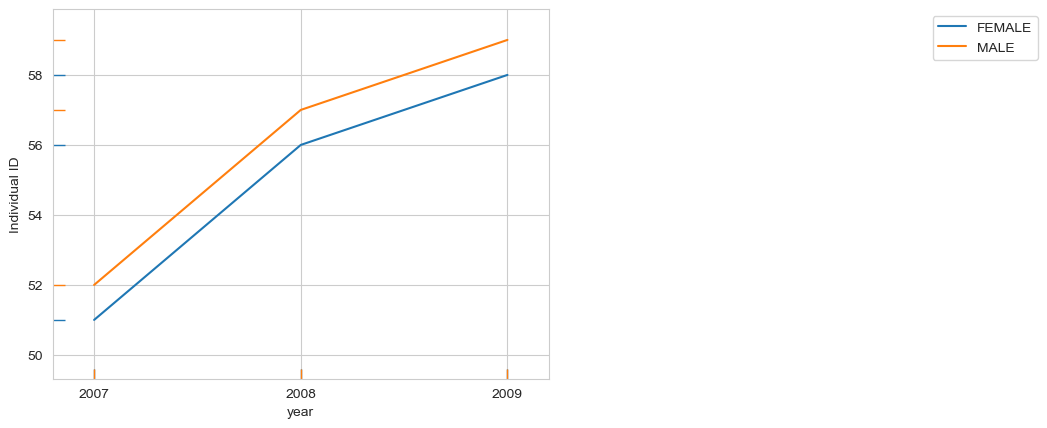

In [42]:
sns.lineplot(data = sex_yearly, x = 'year', y = 'Individual ID', hue = 'Sex')
sns.rugplot(data = sex_yearly, x = 'year', y = 'Individual ID', hue = 'Sex')
plt.legend(bbox_to_anchor=(2, 1))
plt.show()

**Kesimpulan**: 
- Banyak individu pinguin berkelamin jantan dan betina sama-sama mengalami kenaikan dengan nilai kenaikan yang serupa
- Pinguin berkelamin jantan memiliki jumlah yang lebih banyak daripada berkelamin betina

#### Banyak terjadinya cluth completion pada berdasarkan hari dan bulan

In [43]:
clutch_daily = line_df.query("Clutch_Completion == 'Yes'").groupby(["day"]).agg({"Clutch_Completion": pd.Series.count})
clutch_daily

,Clutch_Completion
day,
11-02,6
11-03,8
11-04,10
11-05,2
11-06,12
11-07,2
11-08,8
11-09,21
11-10,8


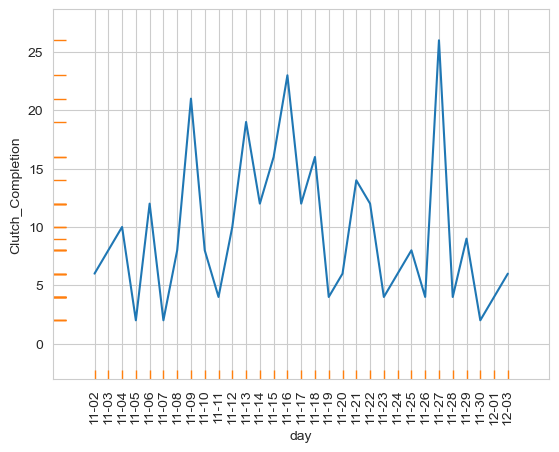

In [44]:
sns.lineplot(data = clutch_daily, x = 'day', y = 'Clutch_Completion')
sns.rugplot(data = clutch_daily, x = 'day', y = 'Clutch_Completion')
plt.xticks(rotation=90)
plt.show()

#### Persebaran masing-masing spesies pada tanggal

In [45]:
individu_daily = line_df.groupby(["day", "Species"]).agg({"Individual ID": pd.Series.count})
individu_daily

Individual ID
day   Species                 
11-02 Adelie               2.0
      Chinstrap            NaN
      Gentoo               4.0
11-03 Adelie               NaN
      Chinstrap            NaN
...                        ...
12-01 Chinstrap            NaN
      Gentoo               5.0
12-03 Adelie               NaN
      Chinstrap            2.0
      Gentoo               4.0

[93 rows x 1 columns]

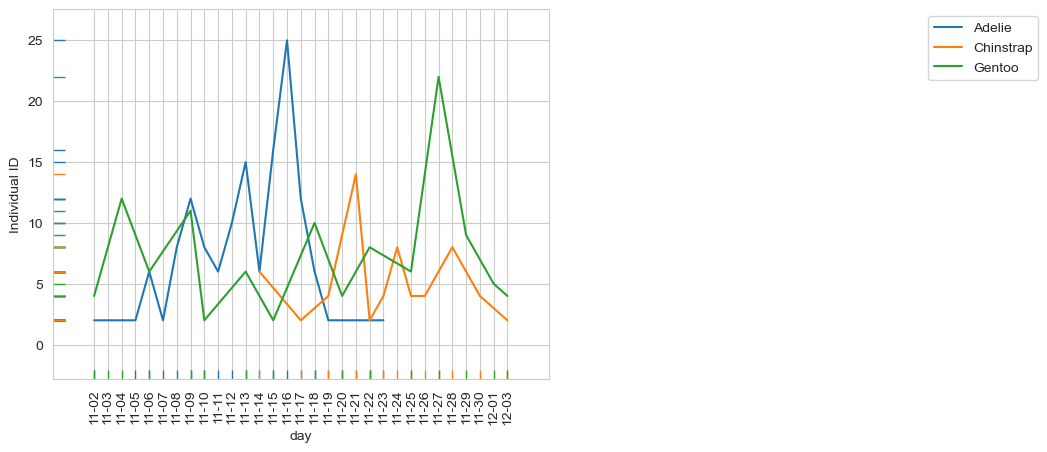

In [46]:
# distribusi perbulan tidak terlalu diperlukan, sehingga hanya akan dilakukan pertahun
sns.lineplot(data=individu_daily, x="day", y="Individual ID", hue = "Species")
sns.rugplot(data=individu_daily, x="day", y="Individual ID", hue = "Species")
plt.legend(bbox_to_anchor=(2, 1))
plt.xticks(rotation=90)
plt.show()

**Kesimpulan**: 
- Species Adelie lebih sering ditemui pada tanggal 13 - 17 November
- Species Chinstrap lebih sering ditemui pada tanggal 19 - 21 November
- Species Gentoo lebih sering ditemui pada tanggal 25 - 29 November

### Dist Plot

#### Distribusi nilai pada masing-masing fitur

In [47]:
# daftar kolom bertipe kuantitatif
kuantitatif = list(lter_df.select_dtypes(['int64', 'float64']))
kuantitatif

['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

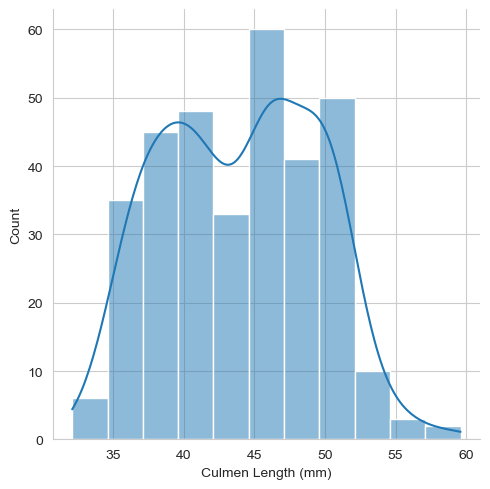

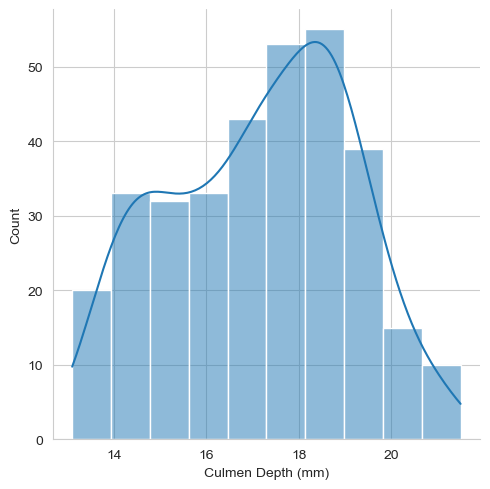

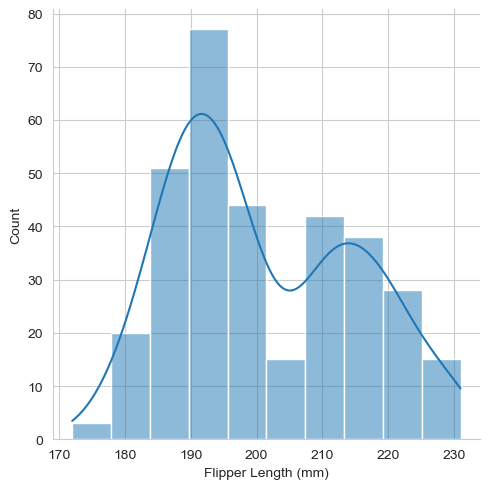

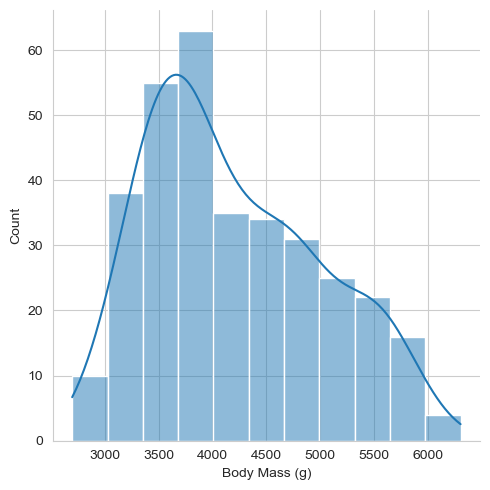

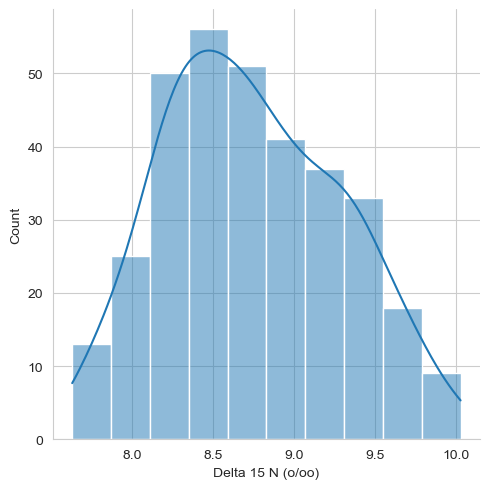

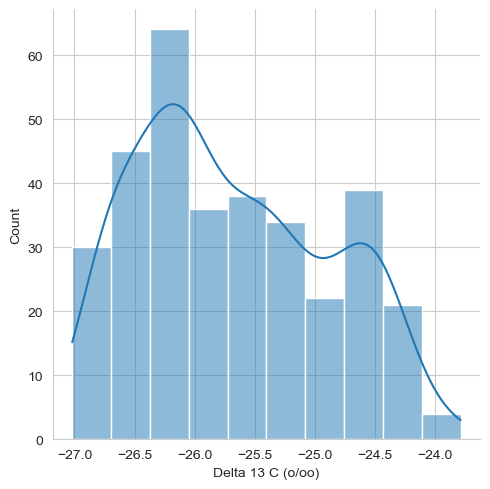

In [48]:
for i in range(len(kuantitatif)):
  sns.displot(data = lter_df, x = kuantitatif[i], kde = True)

**Kesimpulan**:
- Culmen Length (mm) tidak berdistribusi normal
- Culmen Depth (mm) tidak berdistribusi normal
- Flipper Length (mm) tidak berdistribusi normal
- Body Mass (g) berdistribusi normal
- Delta 15 N (o/oo) berdistribusi normal
- Delta 13 C (o/oo) tidak berdistribusi normal

Fitur dengan kondisi terdistribusi normal akan dilakukan normalisasi. Sedangkan, fitur tidak berdistribusi normal akan dilakukan standarisasi.

#### Keterkaitan dengan fitur `Species`

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


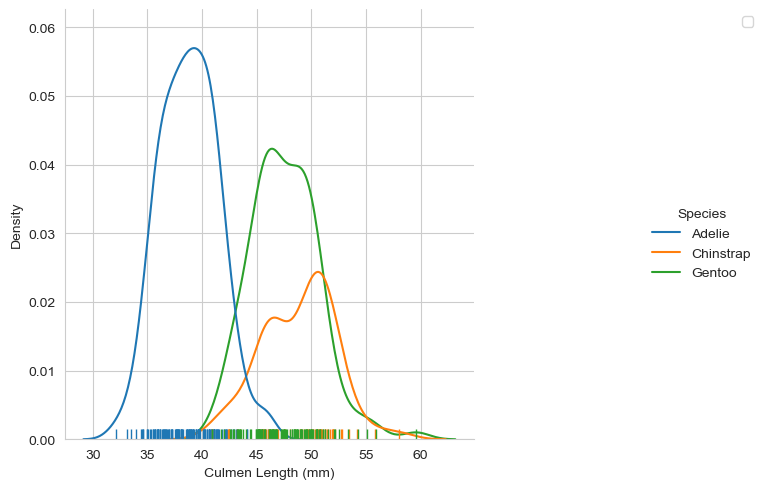

In [49]:
sns.displot(data = lter_df, x = lter_df["Culmen Length (mm)"], hue = lter_df["Species"], kind = "kde")
sns.rugplot(data = lter_df, x = lter_df["Culmen Length (mm)"], hue = lter_df["Species"])
plt.legend(bbox_to_anchor=(1.7, 1))
plt.show()

**Kesimpulan**:
- Kebanyakan spesies Adelie memiliki nilai culment length nilai 25 - 40 mm
- Kebanyakan spesies Chinstrap memiliki nilai culment length nilai 47 - 52 mm
- Kebanyakan spesies Gentoo memiliki nilai culment length nilai 45 - 50 mm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


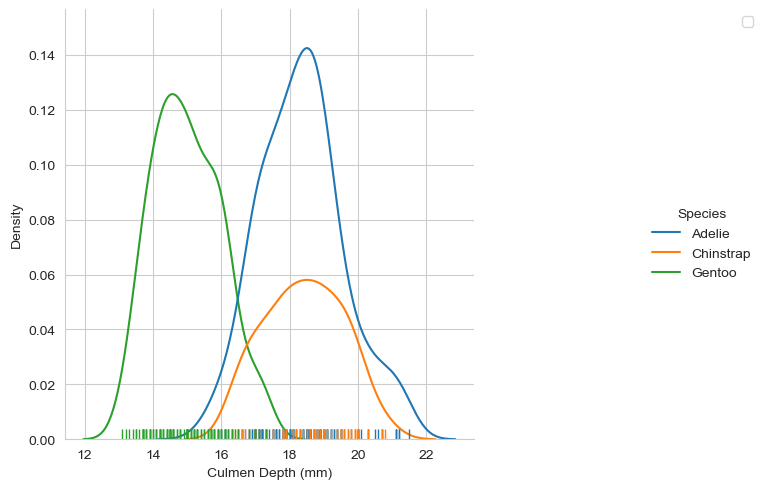

In [50]:
sns.displot(data = lter_df, x = lter_df["Culmen Depth (mm)"], hue = lter_df["Species"], kind = "kde")
sns.rugplot(data = lter_df, x = lter_df["Culmen Depth (mm)"], hue = lter_df["Species"])
plt.legend(bbox_to_anchor=(1.7, 1))
plt.show()

**Kesimpulan**:
- Kebanyakan spesies Adelie memiliki nilai culment depth nilai 18 - 19 mm
- Kebanyakan spesies Chinstrap memiliki nilai culment depth nilai 18 - 19 mm
- Kebanyakan spesies Gentoo memiliki nilai culment depth nilai 14 - 15 mm

Mayoritas spesies Adeli dan Chinstrap memiliki nilai culment depth yang sama

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


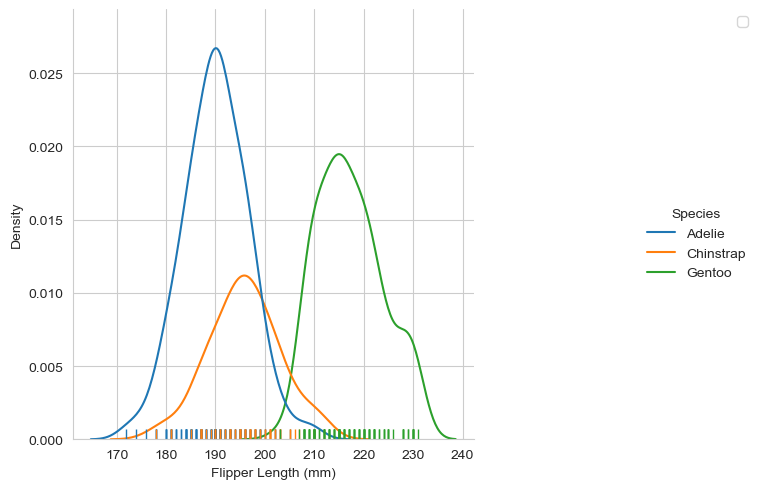

In [51]:
sns.displot(data = lter_df, x = lter_df["Flipper Length (mm)"], hue = lter_df["Species"], kind = "kde")
sns.rugplot(data = lter_df, x = lter_df["Flipper Length (mm)"], hue = lter_df["Species"])
plt.legend(bbox_to_anchor=(1.7, 1))
plt.show()

**Kesimpulan**:
- Kebanyakan spesies Adelie memiliki nilai flipper length nilai 185 - 195 mm
- Kebanyakan spesies Chinstrap memiliki nilai flipper length nilai 190 - 200 mm
- Kebanyakan spesies Gentoo memiliki nilai flipper length nilai 210 - 220 mm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


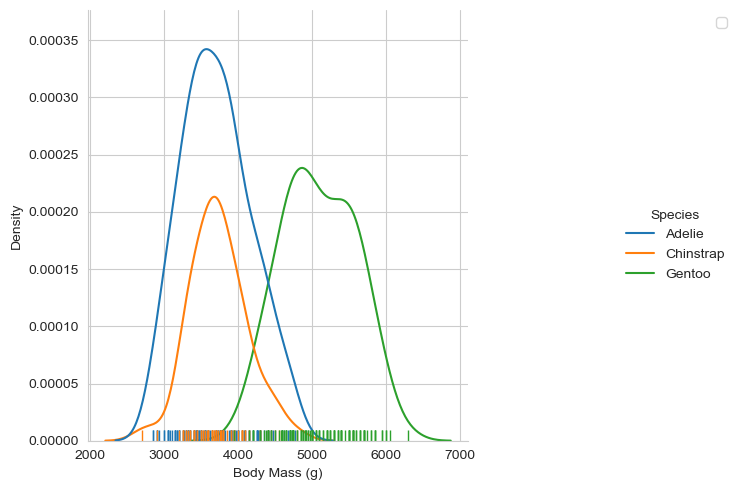

In [52]:
sns.displot(data = lter_df, x = lter_df["Body Mass (g)"], hue = lter_df["Species"], kind = "kde")
sns.rugplot(data = lter_df, x = lter_df["Body Mass (g)"], hue = lter_df["Species"])
plt.legend(bbox_to_anchor=(1.7, 1))
plt.show()

**Kesimpulan**:
- Kebanyakan spesies Adelie memiliki nilai body mass kisaran 3500 g
- Kebanyakan spesies Chinstrap memiliki nilai body mass kisaran 3500 g
- Kebanyakan spesies Gentoo memiliki nilai body mass nilai 5000 g

Mayoritas spesies Adeli dan Chinstrap memiliki nilai body mass yang sama

### Box Plot

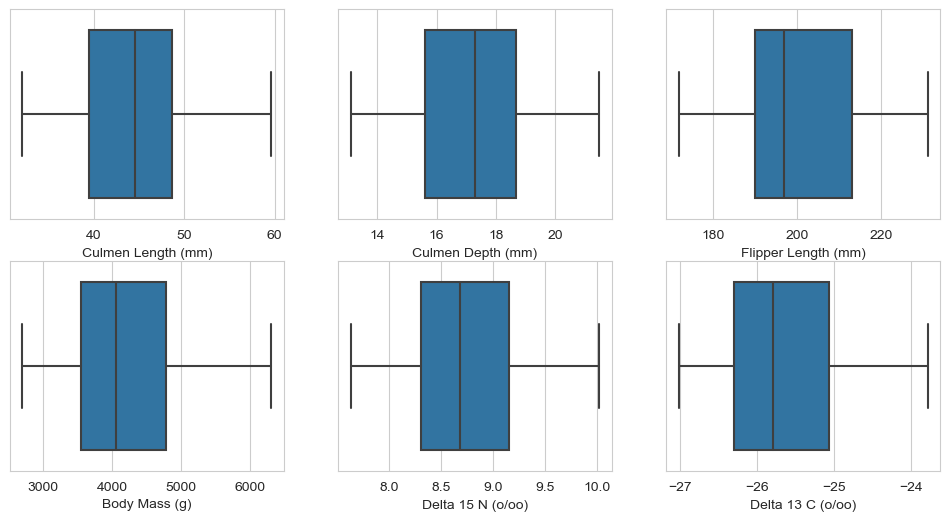

In [53]:
cols = 3
rows = math.ceil(len(kuantitatif) / cols)

fig = plt.figure(figsize=(cols*4,rows*3))
for i in range(len(kuantitatif)):
  fig.add_subplot(rows, cols, i+1)
  sns.boxplot(x = kuantitatif[i], data = lter_df)

In [54]:
kuantitatif

['Culmen Length (mm)',
 'Culmen Depth (mm)',
 'Flipper Length (mm)',
 'Body Mass (g)',
 'Delta 15 N (o/oo)',
 'Delta 13 C (o/oo)']

**Kesimpulan**:
- Culmen Length (mm) tidak memiliki outlier
- Culmen Depth (mm) tidak memiliki outlier
- Flipper Length (mm) tidak memiliki outlier
- Body Mass (g) tidak memiliki outlier
- Delta 15 N (o/oo) tidak memiliki outlier
- Delta 13 C (o/oo) tidak memiliki outlier

Tidak diperlukan penanganan outlier

### Point Plot

<Axes: xlabel='Island', ylabel='Body Mass (g)'>

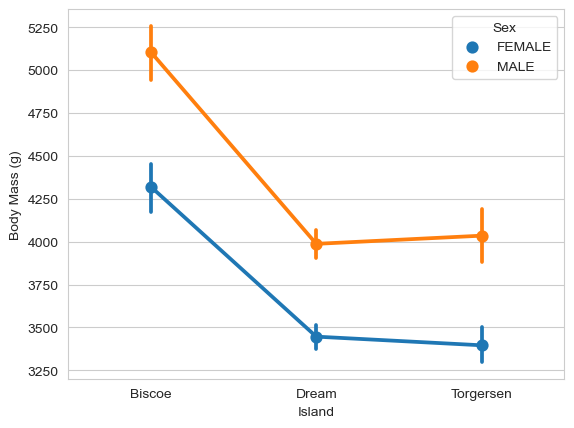

In [55]:
sns.pointplot(data=lter_df, x="Island", y="Body Mass (g)", hue="Sex")

<Axes: xlabel='Island', ylabel='Delta 15 N (o/oo)'>

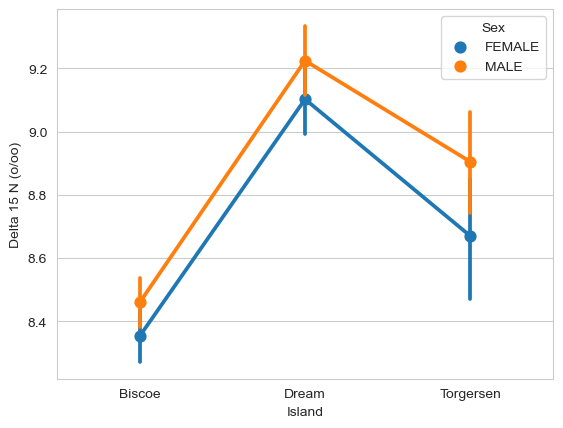

In [56]:
sns.pointplot(data=lter_df, x="Island", y="Delta 15 N (o/oo)", hue="Sex")

<Axes: xlabel='Island', ylabel='Delta 13 C (o/oo)'>

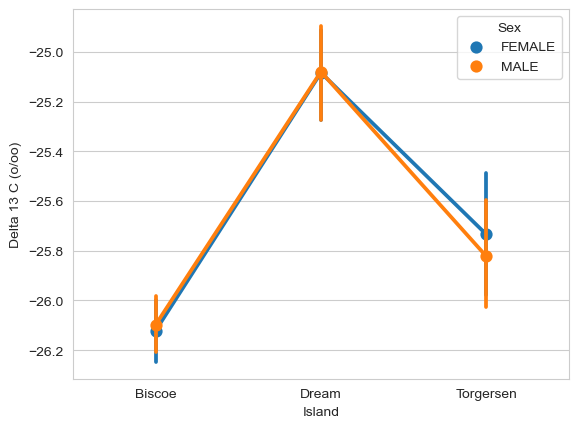

In [57]:
sns.pointplot(data=lter_df, x="Island", y="Delta 13 C (o/oo)", hue="Sex")

<Axes: xlabel='Island', ylabel='Flipper Length (mm)'>

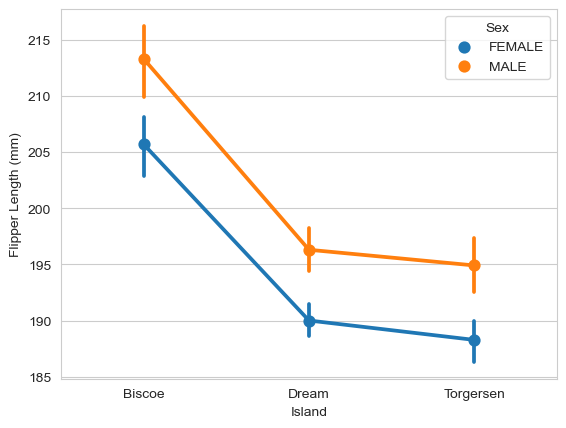

In [58]:
sns.pointplot(data=lter_df, x="Island", y="Flipper Length (mm)", hue="Sex")

<Axes: xlabel='Island', ylabel='Culmen Length (mm)'>

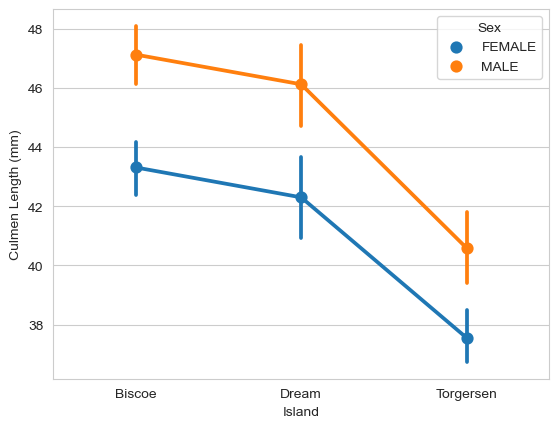

In [59]:
sns.pointplot(data=lter_df, x="Island", y="Culmen Length (mm)", hue="Sex")

<Axes: xlabel='Island', ylabel='Culmen Depth (mm)'>

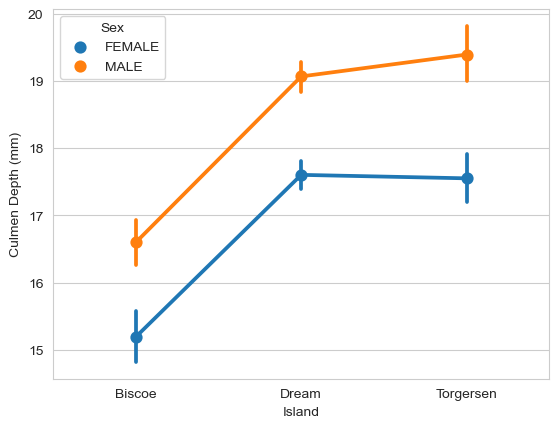

In [60]:
sns.pointplot(data=lter_df, x="Island", y="Culmen Depth (mm)", hue="Sex")

**Kesimpulan**:
Pada setiap fitur bertipe metrik, yakni Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Sex, Delta 15 N (o/oo), Delta 13 C (o/oo) pinguin berkelamin jantan memiliki nilai fitur yang lebih besar daripada betina pada setiap pulau

### Count Plot

In [61]:
# daftar kolom bertipe kategorikal
kategorikal = list(lter_df.select_dtypes(['category']))
print(kategorikal)
# daftar kolom bertipe kuantitatif
kuantitatif = list(lter_df.select_dtypes(['int64', 'float64']))
print(kuantitatif)

['Species', 'Island', 'Individual ID', 'Clutch Completion', 'Sex']
['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)']


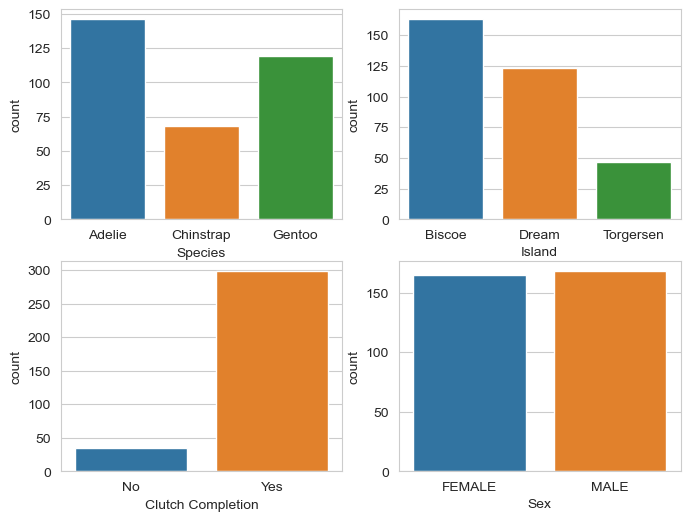

In [62]:
countkategorikal = kategorikal.copy()
countkategorikal.remove("Individual ID")

cols = 2
rows = math.ceil(len(countkategorikal) / cols)

fig = plt.figure(figsize=(cols*4,rows*3))
for i in range(len(countkategorikal)):
  fig.add_subplot(rows, cols, i+1)
  sns.countplot(x = countkategorikal[i], data = lter_df)

**Kesimpulan**: 
- persebaran nilai pada Species tidak seimbang
- persebaran Island pada Species tidak seimbang
- persebaran Clutch Completion pada Species tidak seimbang
- persebaran Sex pada Species seimbang

### Lm Plot

In [63]:
lter_df.columns

Index(['Species', 'Island', 'Individual ID', 'Clutch Completion', 'Date Egg',
       'Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)',
       'Body Mass (g)', 'Sex', 'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

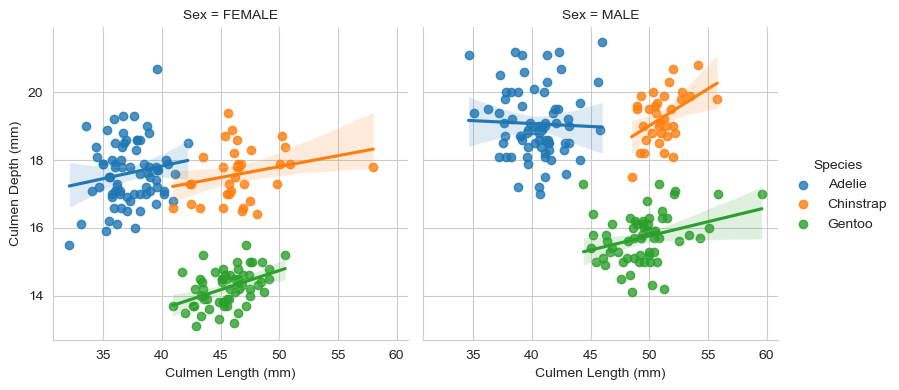

In [64]:
sns.lmplot(
    data=lter_df, x="Culmen Length (mm)", y="Culmen Depth (mm)",
    hue="Species", col="Sex", height=4,
)

Berdasarkan Plot diatas dapat dilihat bahwa:

1. Species Adelie Penguin dan Species Chinstrap Penguin memiliki ciri panjang punggung paruh yang paling panjang dan kedalaman punggung paruh yang paling dalam baik itu famale dan male
2. Species Gentoo Penguin memiliki ciri panjang punggung paruh yang paling pendek dan kedalaman paruh yang paling dangkal baik itu famale dan male

## DATA PREPROCESSING

### Handle Categorycal Data

Label Encode For Data: Species, Sex, dan Clutch Completion 

In [65]:
lter_df["Species"] = lter_df["Species"].cat.codes
lter_df["Sex"] = lter_df["Sex"].cat.codes
lter_df["Clutch Completion"] = lter_df["Clutch Completion"].cat.codes
lter_df["Island"] = lter_df["Island"].cat.codes

In [66]:
print(lter_df[['Species', 'Sex', 'Clutch Completion']])

     Species  Sex  Clutch Completion
0          0    1                  1
1          0    0                  1
2          0    0                  1
4          0    0                  1
5          0    1                  1
..       ...  ...                ...
338        2    0                  0
340        2    0                  1
341        2    1                  1
342        2    0                  1
343        2    1                  1

[333 rows x 3 columns]


In [67]:
# menampilkan unique values pada kolom 'Species'
print(lter_df['Species'].unique())

# menampilkan unique values pada kolom 'Sex'
print(lter_df['Sex'].unique())

# menampilkan unique values pada kolom 'Clutch Completion'
print(lter_df['Clutch Completion'].unique())

[0 1 2]
[1 0]
[1 0]


One Hot Encode For Data : Island

In [68]:
# # Melakukan one-hot encoding pada kolom 'Island'
# one_hot = pd.get_dummies(lter_df['Island'], prefix='Island')

# # Menggabungkan hasil one-hot encoding dengan dataset awal
# lter_df = pd.concat([lter_df, one_hot], axis=1)

# print(one_hot)

### Standarisasi dan Normalisasi

**Hasil Displot**:
- Culmen Length (mm) tidak berdistribusi normal
- Culmen Depth (mm) tidak berdistribusi normal
- Flipper Length (mm) tidak berdistribusi normal
- Body Mass (g) berdistribusi normal
- Delta 15 N (o/oo) berdistribusi normal
- Delta 13 C (o/oo) tidak berdistribusi normal

Fitur dengan kondisi terdistribusi normal akan dilakukan normalisasi. Sedangkan, fitur tidak berdistribusi normal akan dilakukan standarisasi.

##### Standarisasi
Fitur yang akan dilakukan standarisasi antara lain:
- Culmen Length (mm)
- Culmen Depth (mm)
- Flipper Length (mm)
- Delta 13 C (o/oo)

In [69]:
# Menggunakan standard scaler
col_names = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Delta 13 C (o/oo)']
features = lter_df[col_names]

scaler = StandardScaler()
scaler.fit(lter_df[col_names])

lter_df[col_names] = scaler.transform(lter_df[col_names])

##### Normalisasi
Fitur yang akan dilakukan normalisasi antara lain:
- Body Mass (g)
- Delta 15 N (o/oo)

In [70]:
lter_df[['Body Mass (g)', 'Delta 15 N (o/oo)']] = preprocessing.normalize(lter_df[['Body Mass (g)', 'Delta 15 N (o/oo)']])

#### hasil standarisasi dan normalisasi

In [71]:
lter_df.head()

,Species,Island,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,2,N1A1,1,2007-11-11,-0.896042,0.780732,-1.426752,0.999997,1,0.002331,0.000000
1,0,2,N1A2,1,2007-11-11,-0.822788,0.119584,-1.069474,0.999997,0,0.002355,1.257718
2,0,2,N2A1,1,2007-11-16,-0.676280,0.424729,-0.426373,0.999997,0,0.002575,0.445185
4,0,2,N3A1,1,2007-11-16,-1.335566,1.085877,-0.569284,0.999997,0,0.002541,0.456333
5,0,2,N3A2,1,2007-11-16,-0.859415,1.747026,-0.783651,0.999997,1,0.002374,0.489688


In [72]:
lter_df.describe()

,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
count,333.000000,333.000000,333.000000,3.330000e+02,3.330000e+02,3.330000e+02,333.000000,333.000000,333.000000,3.330000e+02
mean,0.918919,0.651652,0.894895,3.840772e-16,6.401286e-16,2.133762e-16,0.999998,0.504505,0.002165,-1.474963e-15
std,0.889718,0.714715,0.307150,1.001505e+00,1.001505e+00,1.001505e+00,0.000001,0.500732,0.000481,1.001505e+00
min,0.000000,0.000000,0.000000,-2.177987e+00,-2.067291e+00,-2.069852e+00,0.999993,0.000000,0.001284,-1.699815e+00
25%,0.000000,0.000000,1.000000,-8.227879e-01,-7.958519e-01,-7.836512e-01,0.999997,0.000000,0.001727,-7.858687e-01
50%,1.000000,1.000000,1.000000,9.288742e-02,6.872642e-02,-2.834620e-01,0.999998,1.000000,0.002213,-1.517426e-01
75%,2.000000,1.000000,1.000000,8.437412e-01,7.807321e-01,8.598276e-01,0.999999,1.000000,0.002533,7.876685e-01
max,2.000000,2.000000,1.000000,2.858227e+00,2.204743e+00,2.146028e+00,0.999999,1.000000,0.003632,2.411805e+00


### Feature Selection

##### correlation matrix

C:\Users\surya\AppData\Local\Temp\ipykernel_2100\3597250429.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = lter_df.corr()


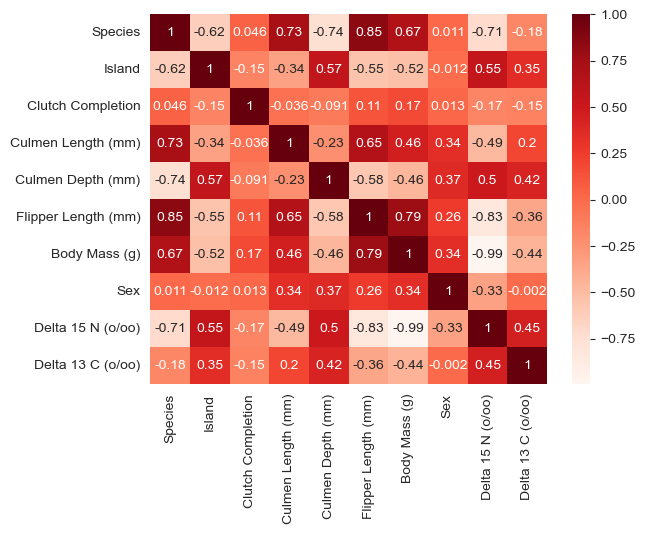

In [73]:
cor = lter_df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [74]:
cor["Species"]

Species                1.000000
Island                -0.622428
Clutch Completion      0.045875
Culmen Length (mm)     0.730548
Culmen Depth (mm)     -0.740346
Flipper Length (mm)    0.850737
Body Mass (g)          0.667719
Sex                    0.010964
Delta 15 N (o/oo)     -0.711119
Delta 13 C (o/oo)     -0.176071
Name: Species, dtype: float64

**Kesimpulan**:
- Korelasi `Species` dengan Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm), Body Mass (g), Delta 15 N (o/oo), Island sangat kuat, yakni memiliki nilai diatas 0.5 atau di bawah -0.5
- Korelasi `Species` dengan Delta 13 C (o/oo), Clutch Completion, dan Sex terbilang rendah, yakni -0.176071, 0.045875, 0.010964

Namun, dapat kita lihat juga bahwa korelasi antar fitur pembanding dengan target juga memiliki nilai yang tinggi, antara lain:
- Flipper Length: Culment Length, Clument Depth
- Body Mass: Flipper Lenght
- Delta 15 N: Flipper Length, Body Mass

#### Drop fitur dengan korelasi yang rendah

In [75]:
lter_df = lter_df.drop(columns=['Delta 13 C (o/oo)', 'Clutch Completion', 'Sex'])
print(lter_df.columns)

Index(['Species', 'Island', 'Individual ID', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)',
       'Delta 15 N (o/oo)'],
      dtype='object')


##### Penanganan Muulticollinearity

In [76]:
# terdapat 5 fitur yang akan direduksi menggunakan PCA (hanya pada tipe mertrik)
ratio = []
for i in range(1, 5):
  pca = PCA(n_components = i)
  pca_features = pca.fit_transform(lter_df[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)']])

  ratio.append(pca.explained_variance_ratio_)

In [77]:
ratio

[array([0.66438876]),
 array([0.66438876, 0.25778235]),
 array([0.66438876, 0.25778235, 0.07782886]),
 array([6.64388763e-01, 2.57782351e-01, 7.78288620e-02, 2.41426989e-08])]

###### Skenario Pengujian: Jumlah Komponen PCA
- 1 komponen
- 2 komponen
- 3 komponen

In [78]:
# 1 KOMPONEN
PCA_1 = lter_df.copy()

pca = PCA(n_components = 1)
pca_features = pca.fit_transform(PCA_1[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)']])
PCA_1 = PCA_1.drop(columns=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)'])
print(PCA_1.columns)

# Mendambahkan component baru pada data frame
PCA_1["PC1"] = pca_features[:,0]
print(PCA_1.columns)

Index(['Species', 'Island', 'Individual ID', 'Date Egg'], dtype='object')
Index(['Species', 'Island', 'Individual ID', 'Date Egg', 'PC1'], dtype='object')


In [79]:
PCA_1.head()

,Species,Island,Individual ID,Date Egg,PC1
0,0,2,N1A1,2007-11-11,-1.833969
1,0,2,N1A2,2007-11-11,-1.220239
2,0,2,N2A1,2007-11-16,-0.871057
4,0,2,N3A1,2007-11-16,-1.666491
5,0,2,N3A2,2007-11-16,-1.883023


In [80]:
# 2 KOMPONEN
PCA_2 = lter_df.copy()

pca = PCA(n_components = 2)
pca_features = pca.fit_transform(PCA_2[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)']])
PCA_2 = PCA_2.drop(columns=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)'])
print(PCA_2.columns)

# Mendambahkan component baru pada data frame
PCA_2["PC1"] = pca_features[:,0]
PCA_2["PC2"] = pca_features[:,1]
print(PCA_2.columns)

Index(['Species', 'Island', 'Individual ID', 'Date Egg'], dtype='object')
Index(['Species', 'Island', 'Individual ID', 'Date Egg', 'PC1', 'PC2'], dtype='object')


In [81]:
PCA_2.head()

,Species,Island,Individual ID,Date Egg,PC1,PC2
0,0,2,N1A1,2007-11-11,-1.833969,-0.050259
1,0,2,N1A2,2007-11-11,-1.220239,-0.488110
2,0,2,N2A1,2007-11-16,-0.871057,-0.138089
4,0,2,N3A1,2007-11-16,-1.666491,-0.076135
5,0,2,N3A2,2007-11-16,-1.883023,0.726820


In [82]:
# 3 KOMPONEN
PCA_3 = lter_df.copy()

pca = PCA(n_components = 3)
pca_features = pca.fit_transform(PCA_3[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)']])
PCA_3 = PCA_3.drop(columns=['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Delta 15 N (o/oo)'])
print(PCA_3.columns)

# Mendambahkan component baru pada data frame
PCA_3["PC1"] = pca_features[:,0]
PCA_3["PC2"] = pca_features[:,1]
PCA_3["PC3"] = pca_features[:,2]
print(PCA_3.columns)

Index(['Species', 'Island', 'Individual ID', 'Date Egg'], dtype='object')
Index(['Species', 'Island', 'Individual ID', 'Date Egg', 'PC1', 'PC2', 'PC3'], dtype='object')


In [83]:
PCA_3.head()

,Species,Island,Individual ID,Date Egg,PC1,PC2,PC3
0,0,2,N1A1,2007-11-11,-1.833969,-0.050259,0.286502
1,0,2,N1A2,2007-11-11,-1.220239,-0.488110,0.328359
2,0,2,N2A1,2007-11-16,-0.871057,-0.138089,-0.204289
4,0,2,N3A1,2007-11-16,-1.666491,-0.076135,-0.709904
5,0,2,N3A2,2007-11-16,-1.883023,0.726820,-0.575115


##### Drop kolom Date Egg untuk pemrosesan ML (apabila diperlukan)

In [84]:
PCA_1 = PCA_1.drop(columns=['Date Egg'])
PCA_2 = PCA_2.drop(columns=['Date Egg'])
PCA_3 = PCA_3.drop(columns=['Date Egg'])

In [85]:
# lter_df = lter_df.drop(columns=['Date Egg'])
# print(lter_df.columns)

In [86]:
# cor = lter_df.corr()
# sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
# plt.show()

#### Drop fitur `Individual ID`
Individual ID dapat didrop dikarenakan tidak akan ada pengaruh terhadap nilai target `Species`. Melainkan keterkaitannya adalah individu A berspecies Adelia.

In [87]:
# lter_df = lter_df.drop(columns=['Individual ID'])
# lter_df.columns

In [88]:
PCA_1 = PCA_1.drop(columns=['Individual ID'])
PCA_2 = PCA_2.drop(columns=['Individual ID'])
PCA_3 = PCA_3.drop(columns=['Individual ID'])

#### Pengambilan nilai target dan predictor

In [89]:
# df = lter_df.copy()
# X_raw = df.drop(columns=['Species'])

# X = X_raw.values
# y = lter_df["Species"].values

In [90]:
y1 = PCA_1["Species"].values
y2 = PCA_2["Species"].values
y3 = PCA_3["Species"].values

X_raw1 = PCA_1.drop(columns=['Species'])
X1 = X_raw1.values

X_raw2 = PCA_2.drop(columns=['Species'])
X2 = X_raw2.values

X_raw3 = PCA_3.drop(columns=['Species'])
X3 = X_raw3.values

#### Melakukan Split data menjadi train dan test

In [91]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [92]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size = 0.3, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.3, random_state = 0)

In [93]:
sm = SMOTE()
X_train1, y_train1 = sm.fit_resample(X_train1, y_train1)
X_train2, y_train2 = sm.fit_resample(X_train2, y_train2)
X_train3, y_train3 = sm.fit_resample(X_train3, y_train3)

#### TESTING TRAINING DENGAN SVM

In [94]:
clf1 = svm.SVC(kernel='rbf')
clf1.fit(X_train1, y_train1)
yhat1 = clf1.predict(X_test1) 

clf2 = svm.SVC(kernel='rbf')
clf2.fit(X_train2, y_train2) 
yhat2 = clf2.predict(X_test2) 

clf3 = svm.SVC(kernel='rbf')
clf3.fit(X_train3, y_train3) 
yhat3 = clf3.predict(X_test3) 

In [95]:
# REFERENSI: cognitive class SVM
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.88      0.88      0.88        16
           2       1.00      1.00      1.00        36

    accuracy                           0.96       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.96      0.96      0.96       100

Confusion matrix, without normalization
[[36  0]
 [ 0  0]]


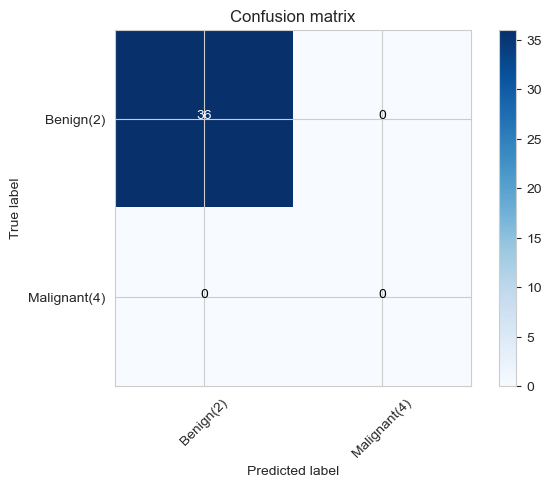

In [96]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test1, yhat1, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test1, yhat1))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        48
           1       0.87      0.81      0.84        16
           2       1.00      1.00      1.00        36

    accuracy                           0.95       100
   macro avg       0.94      0.92      0.93       100
weighted avg       0.95      0.95      0.95       100

Confusion matrix, without normalization
[[36  0]
 [ 0  0]]


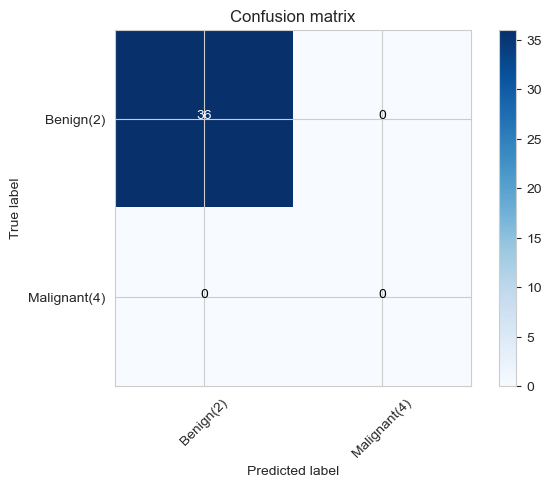

In [97]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test2, yhat2, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test2, yhat2))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        48
           1       1.00      0.81      0.90        16
           2       1.00      1.00      1.00        36

    accuracy                           0.97       100
   macro avg       0.98      0.94      0.96       100
weighted avg       0.97      0.97      0.97       100

Confusion matrix, without normalization
[[36  0]
 [ 0  0]]


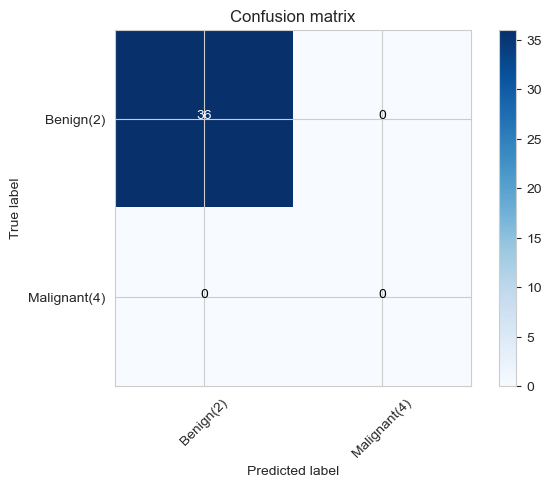

In [98]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test3, yhat3, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(y_test3, yhat3))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['1','2'],normalize= False,  title='Confusion matrix')

### Penanganan Imbalance Data

#### Melakukan oversampling menggunakan SMOTE pada data training
Oversample dipilih dikarenakan jumlah data yang tersedia hanya sedikit, sehingga dipilih oversample agar informasi yang bisa tersimpan lebih besar

In [99]:
# print("Shape sebelum oversampling")
# print(X_train.shape)

In [100]:
# sm = SMOTE()
# X_train, y_train = sm.fit_resample(X_train, y_train)

In [101]:
# print("Shape setelah oversampling")
# print(X_train.shape)

# REFERENSI
- https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html
- https://seaworld.org/animals/all-about/penguins/reproduction/#:~:text=A%20nest%20of%20eggs%20is,at%20least%20one%20chick%20surviving
- https://seaborn.pydata.org/generated/seaborn.displot.html
- https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/
- https://www.statology.org/pandas-count-unique-values/
- https://stackoverflow.com/questions/38420847/apply-standardscaler-to-parts-of-a-data-set
- https://www.educative.io/answers/data-normalization-in-python
- https://towardsdatascience.com/pca-102-should-you-use-pca-how-many-components-to-use-how-to-interpret-them-da0c8e3b11f0#:~:text=Choosing%20the%20Principal%20Components,as%20possible%20of%20that%20threshold.
- https://www.jcchouinard.com/pca-with-python/